ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **23Mar20**

# Laboratory Work 08 (24Mar20) Session 801 Solution
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `your name`

### Rubric for each assignment: 

|        Context          |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>
 +  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
    </span>
 +  <span style="color:red">
    Before submitting, `Kernel` -> `Restart & Run All`, to verify your notebook runs correctly.
    </span>
 +  <span style="color:red">
    Save your file again.
    </span>

---
### Table of Contents
* [Assignment 1 (100pts)](#a1) Reaction rates for nitric acid radiolysis.
 - [1.1)](#a11) Import reaction mechanism.
 - [1.2)](#a12) Species and stoichiometric data.
 - [1.3)](#a13) Compute rank.
 - [1.4)](#a14) Compute reaction rates for given production rates; explain.
 - [1.5)](#a15) Provide a production rate vector that allows for an infinite number of reaction rates, and compute a unique one.
 ---

## <span style="color:blue">Assignment 1 (100 pts): For each item below respond in a separate notebook cell.</span> </span><a id="a1"></a>

<span style="color:blue">
1.1)
Import the following reaction mechanism for silicon vapor deposition from the course repository <b>`data/hno3-rad-rxn.txt`</b> and display the reactions.
</span>
</span><a id="a11"></a>

In [1]:
'''1.1 Import reaction mechanism'''


r0 :  *NO32- + H+ <-> *NO2 + OH-
r1 :  e- + NO3- <-> *NO32-
r2 :  *NO32- + H+ <-> HNO3-_aqu
r3 :  *NO32- + *OH <-> NO3- + OH-
r4 :  *NO32- + O2 <-> NO3- + O2-
r5 :  N2O4 + H2O <-> NO3- + NO2- + 2 H+
r6 :  *NO2 + *OH <-> NO3- + H+
r7 :  *NO2 + H* <-> HNO2
r8 :  *NO2 + HO2* <-> O2NO2H
r9 :  O2NO2H <-> O2NO2- + H+
r10 :  O2NO2- + H+ <-> O2NO2H
r11 :  O2NO2- + e- <-> OH- + NO3-
r12 :  O2NO2H + e- <-> *OH + NO3-
r13 :  NO2- + *OH <-> *NO2 + OH-
r14 :  NO2- + e- <-> NO22-
r15 :  NO2- + H2O <-> NO + 2 OH-
r16 :  ONO2H + e- <-> *NO2 + OH-
r17 :  NO + e- <-> NO-
r18 :  NO + H* <-> NO- + H+
r19 :  NO + *OH <-> NO2- + H+
r20 :  NO + O2- <-> ONO2-
r21 :  NO + HO2* <-> ONO2H
r22 :  ONO2- + e- + H2O <-> *NO2 + 2 OH-
r23 :  *NO2 + NO + H2O <-> 2 HNO2
r24 :  NO + NO- <-> N2O2-
r25 :  NO + N2O2- <-> N3O3-
r26 :  N3O3- <-> NO2- + N2O
r27 :  N2O2- + H+ <-> N2O2H
r28 :  N2O2H <-> N2O2- + H+
r29 :  N2O2H + NO <-> HN3O3
r30 :  HN3O3 <-> N2O + NO2- + H+
r31 :  2 *NO2 <-> N2O4
r32 :  N2O4 <-> 2 *NO2
r33 :  ON

<span style="color:blue">
1.2) Make an organized output of the species and stoichiometric data.
</span><a id="a12"></a>

['H2O', 'HNO2', 'H2NO3', 'H+', '*NO2', 'ONO2H', 'HNO3-', 'O2', 'N3O3-', 'NO3-', 'H*', '*NO32-', 'e-', 'O2NO2-', 'H+_aqu', 'N2O2-', 'HN3O3', 'N2O2H', '*OH', 'H2O2', 'NO-', 'O2*-', 'HO2*', 'O2NO2H', 'NO', 'HNO3-_aqu', 'O2-', 'OH-', 'N2O4', 'NO22-', 'NO2-', 'ONO2-', 'N2O']
# species = 33

s_mtrx =
 [[ 0.  0.  0. -1.  1. ...  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. ...  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0. ...  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. ...  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. ...  0.  0.  0.  0.  0.]
 ...
 [ 0.  0.  0.  1.  0. ...  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0. ...  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0. ...  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  1. ...  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0. ...  0.  0.  0.  0.  0.]]
m x n = (43, 33)
matrix shape = (43, 33)


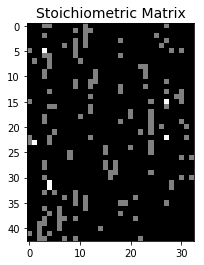

In [3]:
'''1.2 Species and stoichiometric data'''


<span style="color:blue">
1.3) Compute the rank of the stoichiometric matrix using your own algorithm.
</span><a id="a13"></a>

In [4]:
'''1.3 Compute rank'''


rank(S) = 31


<span style="color:blue">
1.4) Given the artificial production rates vector equal to 0.3 [mol/(s cc)] for all species, compute a reaction rates vector and make a plot. Use your own algorithms and explain your work, that is, what is the meaning of your computed reaction rate vector? What problem are you solving to obtain the reaction rate vector from the given production rate vector? Do the production rate equations have a solution?
</span>
</span><a id="a14"></a>

In [5]:
'''1.4 Compute a reaction rates vector'''


species ['H2O', 'HNO2', 'H2NO3', 'H+', '*NO2', 'ONO2H', 'HNO3-', 'O2', 'N3O3-', 'NO3-', 'H*', '*NO32-', 'e-', 'O2NO2-', 'H+_aqu', 'N2O2-', 'HN3O3', 'N2O2H', '*OH', 'H2O2', 'NO-', 'O2*-', 'HO2*', 'O2NO2H', 'NO', 'HNO3-_aqu', 'O2-', 'OH-', 'N2O4', 'NO22-', 'NO2-', 'ONO2-', 'N2O']
reaction rates r_vec= [ 1.251e-01 -5.441e-01 -3.280e-02 -3.622e-01 -1.974e-01 -1.930e-01
 -4.873e-01 -4.256e-01  3.488e-01  7.839e-01 -7.839e-01  1.706e+00
 -1.081e+00 -4.081e-01  7.285e-02  6.519e-02 -4.019e-01  2.007e-01
  1.256e-01 -1.669e-01 -2.861e-01 -4.175e-01 -2.533e-01  2.492e-01
  1.478e-01  2.509e-02  8.955e-02  3.284e-02 -3.284e-02  8.666e-03
  7.313e-02 -1.736e-01  1.736e-01  1.719e-02 -4.446e-02 -8.868e-02
 -2.430e-04 -6.089e-02  4.422e-02  3.497e-01  3.000e-01  6.250e-02
  2.002e-02]
   ||r|| = 2.739e+00
||g - ST r||                 = 1.50381e+00


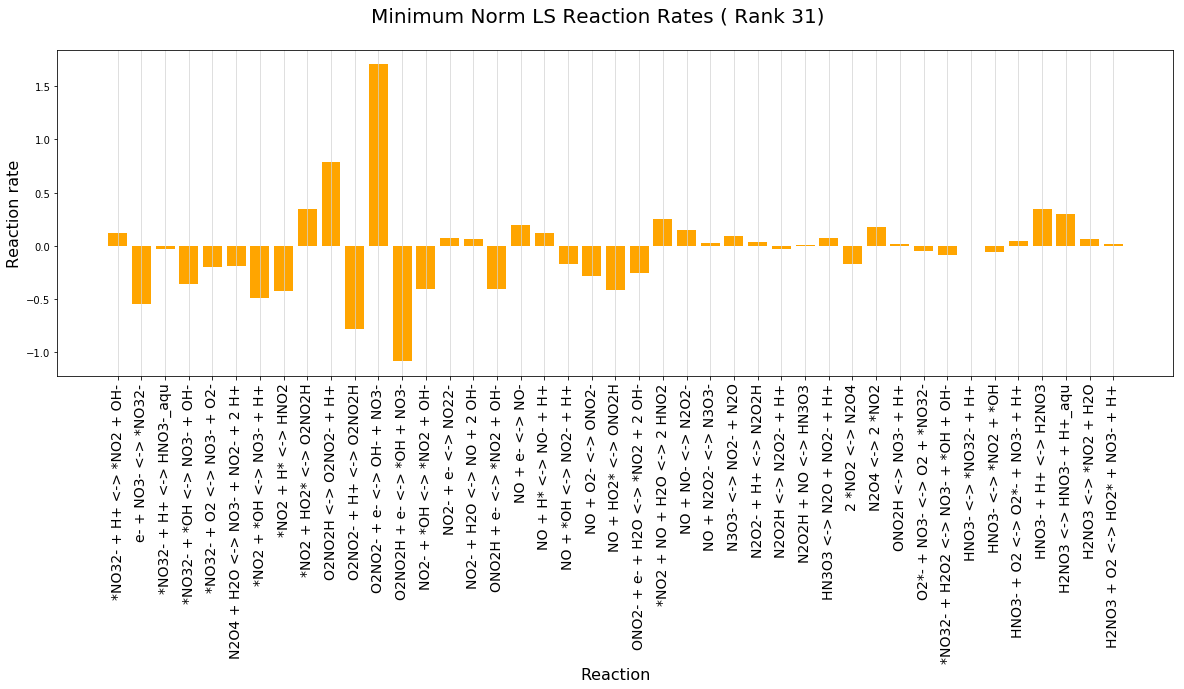

In [6]:
'''1.4 Plot of reaction rates'''


**Meaning of the computed reaction rates vector:** Because the stoichiometric matrix is rank-deficient, the reaction rates vector, $\rvec_\text{MNLS}$, computed here is the unique least-squares reaction rate of minimum norm that satisfies:

\begin{equation*}
 \lim\limits_{\epsilon\rightarrow 0}\,\min\limits_\rvec \bigl( \norm{\gvec - \Smtrx^\top\,\rvec_\text{MNLS}}^2 + \epsilon\norm{\rvec_\text{MNLS}}^2 \bigr) \quad\  \forall \quad\ \rvec.
\end{equation*}

The value $\epsilon = 10^{-6}$ produces a converged solution. In addition, the original problem 

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec
\end{equation*}

for the given $\gvec$ has no solution because the residual $\norm{\gvec - \Smtrx^\top\,\rvec}$ is not small.

<span style="color:blue">
1.5) Find a production rate vector $\gvec$ for which the problem 

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec
\end{equation*}

has an infinite number of solutions, and compute a unique solution from this infinite set.
</span>
</span><a id="a15"></a>

In [7]:
'''1.5 Find production rates for unique reaction rates'''


reaction rates r_vec= [ 0.18  -0.421 -0.091 -0.459 -0.116 -0.315 -0.639 -0.133 -1.299  0.262
 -0.262  0.998  0.228 -0.015 -0.347 -0.228 -0.732 -0.471  0.14  -0.003
  0.16   0.281  0.006  0.38  -0.977 -0.992  0.115 -0.07   0.07  -0.227
 -0.579 -0.183  0.183 -0.49   0.533  0.452 -0.344  0.193 -0.876 -0.474
  0.506  0.185  0.505]
   ||r|| = 3.143e+00
||g - ST r||                 = 6.06780e-08
